In [1]:
import json
from pprint import pprint

# read data
in_file = "data/ocha-norma.ndjson"
entries = list(map(json.loads, open(in_file).read().strip().split("\n")))
entries = list(map(lambda e: e["entry"] | e["reaction"], entries))
pprint(entries[0])

{'blog_id': 10064759828,
 'closed_flg': 'off',
 'commentCnt': 53,
 'contribution_flg': 'api',
 'deny_comment': 'accept',
 'deny_comment_disp': 'accept',
 'deny_reblog': 'accept',
 'editor_type': 'miracle',
 'entry_created_datetime': '2022-07-29T23:30:50.000+09:00',
 'entry_id': 12755975296,
 'entry_last_editor_id': 10064902773,
 'entry_title': '綺麗な形の桃ですね！☘ 北原もも',
 'hash_tag_list': [],
 'hashtag_flg': 'None',
 'iineCnt': 241,
 'image_id': 15153447989,
 'image_url': '/user_images/20220729/23/ocha-norma/48/d4/j/o1080144015153447989.jpg',
 'ins_datetime': '2022-07-29T23:31:49.000+09:00',
 'last_edit_datetime': '2022-07-29T23:31:49.000+09:00',
 'last_reblogged_datetime': '2022-07-30T08:45:19.000+09:00',
 'pr_flg': '0',
 'publish_flg': 'open',
 'reblogCnt': 1,
 'record_status': '0',
 'send_mail_flg': '1',
 'theme_id': 10116082093,
 'theme_name': '北原もも',
 'upd_datetime': '2022-07-30T12:28:40.000+09:00',
 'user_id': 10064902773,
 'user_type': 'Normal'}


In [2]:
import pandas as pd

df = pd.DataFrame.from_records(entries)

# show blog count
df["theme_name"].value_counts()

北原もも     214
広本瑠璃     214
筒井澪心     214
窪田七海     213
中山夏月姫    213
田代すみれ    212
米村姫良々    212
斉藤円香     212
石栗奏美     207
西﨑美空     206
ブログ        3
Name: theme_name, dtype: int64

In [3]:
# set index column
df["entry_created_datetime"] = pd.to_datetime(df["entry_created_datetime"])
df = df.set_index("entry_created_datetime")
df = df.sort_index()

# filter out mis-labeled entries
df = df[df["theme_name"] != "ブログ"]

# list of them_name (i.e. authors)
theme_names = list(df["theme_name"].unique())
theme_names

['米村姫良々',
 '広本瑠璃',
 '西﨑美空',
 '筒井澪心',
 '中山夏月姫',
 '田代すみれ',
 '北原もも',
 '石栗奏美',
 '窪田七海',
 '斉藤円香']

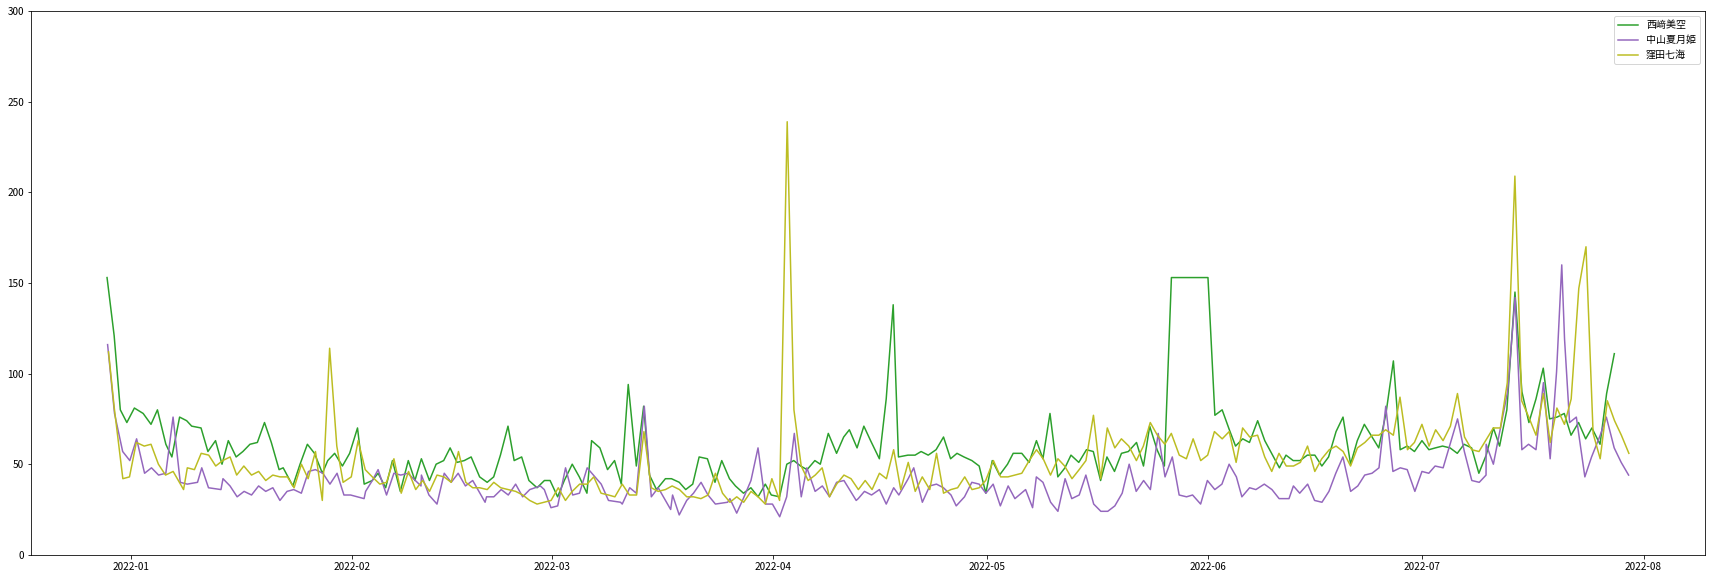

In [4]:
#
# plot commentCnt
#

import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["Noto Sans CJK JP", "sans-serif"]
cmap = plt.get_cmap("tab10")


def plot(selected: tuple[str, ...] = ()):
    _, ax = plt.subplots(figsize=(30, 10))
    ax.set_ylim((0, 300))
    for i, theme_name in enumerate(theme_names):
        if theme_name not in selected:
            continue
        df_theme = df[df["theme_name"] == theme_name]
        ax.plot(df_theme.index, df_theme["commentCnt"], label=theme_name, color=cmap(i))
    ax.legend()


#
# interactive mode
#
# import ipywidgets as ipyw
# ipyw.interact(
#     plot,
#     selected=ipyw.SelectMultiple(
#         options=theme_names, value=("窪田七海", "中山夏月姫", "西﨑美空"), rows=len(theme_names)
#     ),
# )

plot(("窪田七海", "中山夏月姫", "西﨑美空"))